In [3]:
import requests
import pandas as pd
import json
import datetime as dt
#import geopandas as gpd
import matplotlib.pyplot as plt

In [4]:
#requesting data for the price of rice in EU member states
riceprice=requests.get("https://www.ec.europa.eu/agrifood/api/rice/prices?")

In [5]:
#Raw Data cleaning
df_riceprice_rawdata=pd.DataFrame(riceprice.json())
#display(df_riceprice)
#Data filtering 
df_riceprice=df_riceprice_rawdata.copy()
df_riceprice["price"]=df_riceprice["price"].str.replace("€","") # removing the € character in price column
df_riceprice["price"]=pd.to_numeric(df_riceprice["price"])   # changing price data into numeric data type
display(df_riceprice.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19176 entries, 0 to 19175
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   memberStateCode  19176 non-null  object 
 1   memberStateName  19176 non-null  object 
 2   beginDate        19176 non-null  object 
 3   endDate          19176 non-null  object 
 4   weekNumber       19176 non-null  int64  
 5   price            19176 non-null  float64
 6   unit             19176 non-null  object 
 7   marketingYear    19176 non-null  object 
 8   stage            19176 non-null  object 
 9   type             19176 non-null  object 
 10  variety          19176 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 1.6+ MB


None

In [6]:
# formating the beginDate and endDate into Datetime data type
df_riceprice["beginDate"]=pd.to_datetime(df_riceprice["beginDate"],yearfirst=True)
print(df_riceprice.info())


C:\Users\Milner\AppData\Local\Temp\ipykernel_19500\1573098569.py:2: UserWarning: Parsing '17/12/2007' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df_riceprice["beginDate"]=pd.to_datetime(df_riceprice["beginDate"],yearfirst=True)
C:\Users\Milner\AppData\Local\Temp\ipykernel_19500\1573098569.py:2: UserWarning: Parsing '25/02/2008' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df_riceprice["beginDate"]=pd.to_datetime(df_riceprice["beginDate"],yearfirst=True)
C:\Users\Milner\AppData\Local\Temp\ipykernel_19500\1573098569.py:2: UserWarning: Parsing '28/01/2008' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df_riceprice["beginDate"]=pd.to_datetime(df_riceprice["beginDate"],yearfirst=True)
C:\Users\Milner\AppData\Local\Temp\ipykernel_19500\1573098569.py:2: UserWarning: Parsing '28/05/2007' in DD/MM/YYYY format. Provide format or 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19176 entries, 0 to 19175
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   memberStateCode  19176 non-null  object        
 1   memberStateName  19176 non-null  object        
 2   beginDate        19176 non-null  datetime64[ns]
 3   endDate          19176 non-null  object        
 4   weekNumber       19176 non-null  int64         
 5   price            19176 non-null  float64       
 6   unit             19176 non-null  object        
 7   marketingYear    19176 non-null  object        
 8   stage            19176 non-null  object        
 9   type             19176 non-null  object        
 10  variety          19176 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(8)
memory usage: 1.6+ MB
None


In [81]:
# Filtering by Year from RAW data
series_byyear=df_riceprice_rawdata.beginDate.str.extract(r"[/](\d{4})") #Series data for each year
#print(type(df_data_byyear))
df_ricebyyear=pd.concat([df_riceprice, df_data_byyear], axis=1)
df_ricebyyear.rename(columns={0:"Year"}, inplace=True) #Renaming column as Year
df_ricebyyear.set_index("Year", inplace=True) #Sorting index by year
df_ricebyyear.sort_index(inplace=True)
display(df_ricebyyear.sort_values("memberStateName"))
#display(df_ricebyyear.index)

,memberStateCode,memberStateName,beginDate,endDate,weekNumber,price,unit,marketingYear,stage,type,variety
Year,,,,,,,,,,,
2022,BG,Bulgaria,2022-04-04,10/04/2022,32,858.98,Tonne,2021/2022,Milled non parboiled,Japonica,Average
2016,BG,Bulgaria,2016-01-25,31/01/2016,22,871.77,Tonne,2015/2016,Milled non parboiled,Japonica,Not informed
2016,BG,Bulgaria,2016-02-29,06/03/2016,27,871.77,Tonne,2015/2016,Milled non parboiled,Japonica,Not informed
2016,BG,Bulgaria,2016-04-01,10/01/2016,19,871.77,Tonne,2015/2016,Milled non parboiled,Japonica,Not informed
2016,BG,Bulgaria,2016-10-31,06/11/2016,10,818.08,Tonne,2016/2017,Milled non parboiled,Japonica,Not informed
...,...,...,...,...,...,...,...,...,...,...,...
2002,ES,Spain,2002-04-11,10/11/2002,10,255.00,Tonne,2002/2003,Paddy,Japonica,Average
2002,ES,Spain,2002-04-29,05/05/2002,35,270.00,Tonne,2001/2002,Paddy,Japonica,Average
2002,ES,Spain,2002-03-06,09/06/2002,40,270.00,Tonne,2001/2002,Paddy,Japonica,Average


In [89]:
#Filtering data for rice price in each country 
print(df_ricebyyear.memberStateName.unique())
df_Italy=df_ricebyyear[["memberStateName", "price"]].query("memberStateName=='Italy'")
Italy=df_Italy.groupby(["Year"]).mean().rename(columns={"price":"Italy"})
df_Greece=df_ricebyyear[["memberStateName", "price"]].query("memberStateName=='Greece'")
Greece=df_Greece.groupby(["Year"]).mean().rename(columns={"price":"Greece"})
df_Spain=df_ricebyyear[["memberStateName", "price"]].query("memberStateName=='Spain'")
Spain=df_Spain.groupby(["Year"]).mean().rename(columns={"price":"Spain"})
df_Portugal=df_ricebyyear[["memberStateName", "price"]].query("memberStateName=='Portugal'")
Portugal=df_Portugal.groupby(["Year"]).mean().rename(columns={"price":"Portugal"})
df_Bulgaria=df_ricebyyear[["memberStateName", "price"]].query("memberStateName=='Bulgaria'")
Bulgaria=df_Bulgaria.groupby(["Year"]).mean().rename(columns={"price":"Bulgaria"})
df_France=df_ricebyyear[["memberStateName", "price"]].query("memberStateName=='France'")
France=df_France.groupby(["Year"]).mean().rename(columns={"price":"France"})
df_Germany=df_ricebyyear[["memberStateName", "price"]].query("memberStateName=='Germany'")
Germany=df_Germany.groupby(["Year"]).mean().rename(columns={"price":"Germany"})
df_Romania=df_ricebyyear.groupby(["Year"]).mean().rename(columns={"price":"Romania"})
Romania=df_Romania.groupby(["Year"]).mean().rename(columns={"price":"Romania"})
display(Italy, France, Greece, Spain, Portugal, Germany, Romania, Bulgaria)

['Italy' 'Greece' 'Spain' 'Portugal' 'Romania' 'Bulgaria' 'France'
 'Germany']


,Italy
Year,
2000,411.633953
2001,468.339966
2002,455.208054
2003,408.960123
2004,371.696774
2005,314.810127
2006,432.059211
2007,418.216066
2008,666.292169


,France
Year,
2012,471.949686
2013,452.560241
2014,457.837838
2015,533.661417
2016,480.218978
2017,480.630721
2018,551.929895
2019,578.840652
2020,584.333556


,Greece
Year,
2000,255.912727
2001,285.834848
2002,299.525287
2003,281.423077
2004,236.057692
2005,180.043750
2006,216.224752
2007,254.043269
2008,359.326923


,Spain
Year,
2000,360.461250
2001,353.371717
2002,292.870779
2003,383.778447
2004,362.546923
2005,281.724286
2006,271.887014
2007,321.044855
2008,470.063223


,Portugal
Year,
2000,297.783000
2001,307.951458
2002,293.439231
2003,290.223333
2004,177.460000
2005,197.579130
2006,219.074138
2007,274.156250
2008,356.559118


,Germany
Year,
2021,849.326538
2022,1056.510588


,weekNumber,Romania
Year,,
2000,10.869565,362.473478
2001,25.996779,386.423977
2002,25.157787,393.219611
2003,26.064762,381.000381
2004,26.438976,342.879409
2005,26.502683,282.413631
2006,26.029412,343.753599
2007,25.981102,362.950693
2008,24.719120,554.280305


,Bulgaria
Year,
2010,215.126667
2011,218.790067
2012,240.384248
2013,245.943267
2014,236.159032
2015,278.932051
2016,475.295833
2017,480.445267
2018,492.125000


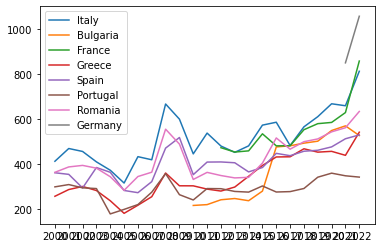

In [90]:
fig, ax = plt.subplots()
ax.plot(Italy.index, Italy["Italy"], label="Italy")

ax.plot(Bulgaria.index, Bulgaria["Bulgaria"], label="Bulgaria")

ax.plot(France.index, France["France"], label="France")

ax.plot(Greece.index, Greece["Greece"], label="Greece")

ax.plot(Spain.index, Spain["Spain"], label="Spain")

ax.plot(Portugal.index, Portugal["Portugal"], label="Portugal")

ax.plot(Romania.index, Romania["Romania"], label="Romania")

ax.plot(Germany.index, Germany["Germany"], label="Germany")
#ax.plot(year, Bulgaria, label="Bulgaria")
ax.legend()

plt.show()

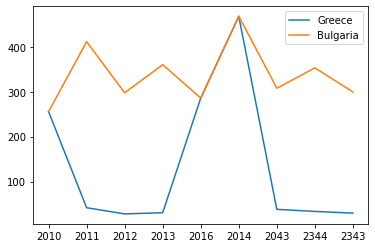

In [37]:
Bulgaria = [255.912727,	411.633953,	297.783,	360.46125,	285.834848,	468.339966,	307.951458,	353.371717,299.525287	]
Greece = [255.912727,41.633953,	27.783,	30.46125,	285.834848,	468.339966,	37.951458,	33.371717,	29.525287	]
year = ["2010", "2011", "2012", "2013", "2016", "2014", "2043", "2344","2343"]

fig, ax = plt.subplots()
ax.plot(year, Greece, label="Greece")
ax.plot(year, Bulgaria, label="Bulgaria")
ax.legend()

plt.show()

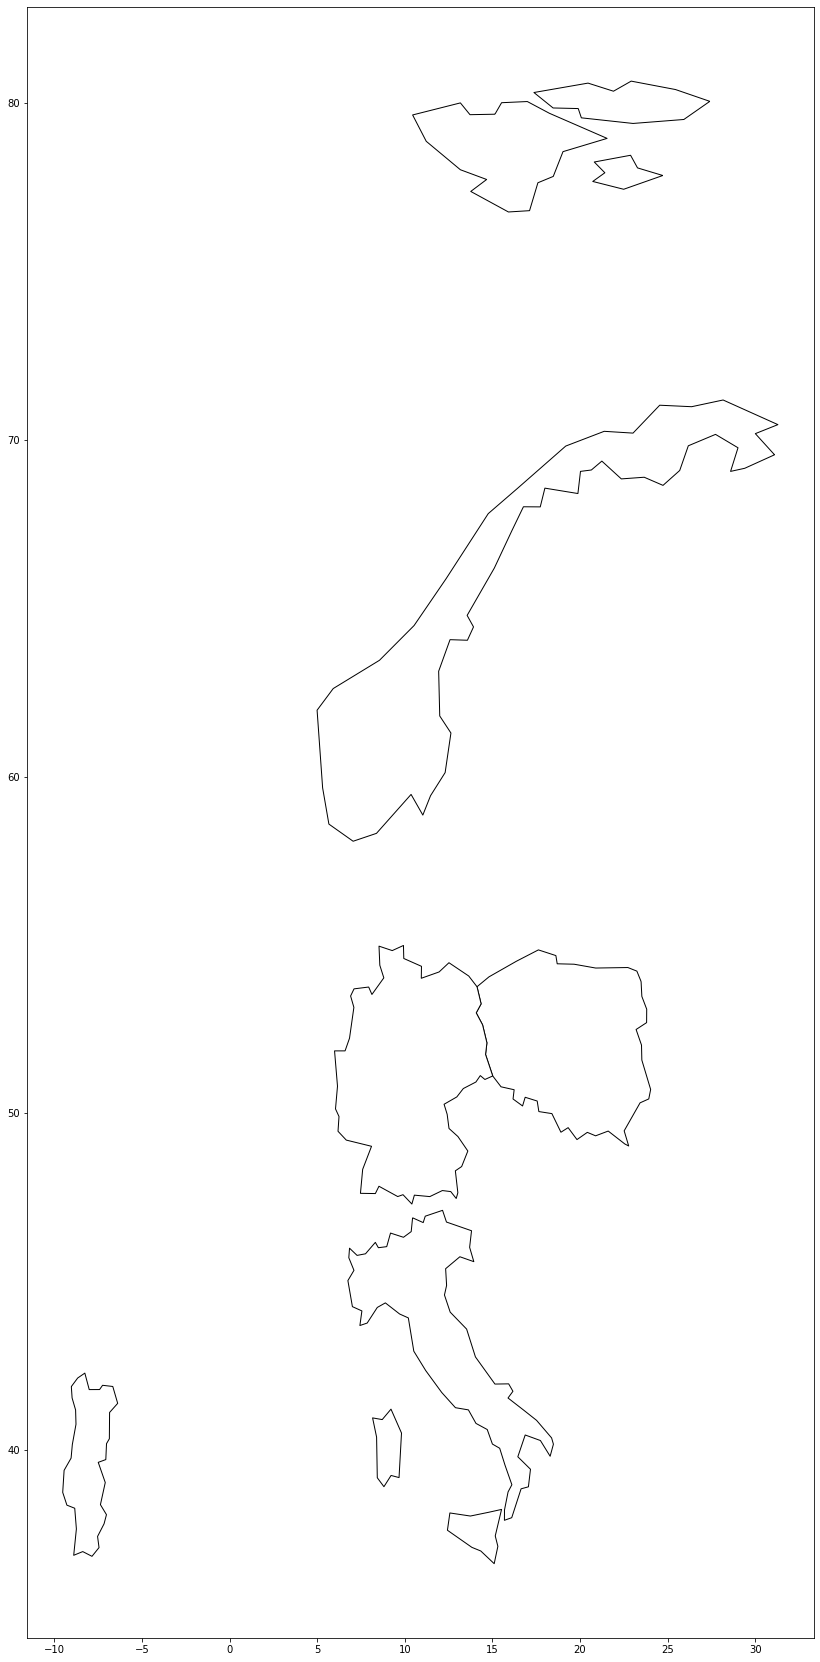

In [ ]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.query("continent=='Europe'").query(f"name=={'Norway','Portugal','Italy','Germany','Poland'}").plot(color='white',edgecolor='black',figsize=(20,30)), 
figsize = (15,20)

Text(0.5, 74.43361717965095, 'Longitude')

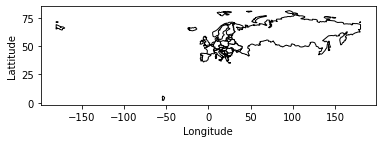

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

#data = pd.read_csv("Repair_yards_africa.csv")

base = world[world.continent == 'Europe'].plot(color='white', edgecolor='black')

#data['Coordinates'] = list(zip(data.lon, data.lat))
#data['Coordinates'] = data['Coordinates'].apply(Point)
#geodata = gpd.GeoDataFrame(data, geometry='Coordinates')
#geodata.plot(ax=base, color='red', markersize=11)
plt.ylabel('Lattitude')
plt.xlabel('Longitude')